In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df1 = pd.read_csv('/Users/rickywang/Desktop/ISE534_Consulting/project/data/uk_obs_coordinates_000000000045')
print(len(df1))
df1.head()

2933269


,Site,Level,ClientMacAddr,lat,lng,localtime
0,UK Office,Ground Floor,00:26:c6:6d:02:3e,51.460572,-0.932341,2020-04-27 02:03:15.636 UTC
1,UK Office,Ground Floor,14:ab:c5:09:b6:f9,51.460553,-0.932335,2020-04-27 02:03:15.636 UTC
2,UK Office,Ground Floor,04:ea:56:92:f9:9b,51.460413,-0.932609,2020-04-27 02:03:15.257 UTC
3,UK Office,Ground Floor,50:de:06:25:5d:40,51.460507,-0.932431,2020-04-27 02:03:13.249 UTC
4,UK Office,Ground Floor,88:66:a5:45:b9:ea,51.460458,-0.933061,2020-04-27 02:03:09.909 UTC


In [3]:
df2 = pd.read_csv('/Users/rickywang/Desktop/ISE534_Consulting/project/data/uk_obs_coordinates_000000000055')
print(len(df2))
df2.head()

3618439


,Site,Level,ClientMacAddr,lat,lng,localtime
0,UK Office,2nd Floor,88:66:a5:12:7a:73,51.460898,-0.932414,2019-08-15 10:23:17.67 UTC
1,UK Office,2nd Floor,5c:5f:67:8b:1a:dc,51.460890,-0.932408,2019-08-15 10:23:17.67 UTC
2,UK Office,2nd Floor,5c:e0:c5:e7:b8:32,51.460896,-0.932419,2019-08-15 10:23:17.67 UTC
3,UK Office,2nd Floor,5c:5f:67:8c:00:87,51.460890,-0.932403,2019-08-15 10:23:17.67 UTC
4,UK Office,2nd Floor,5c:f7:e6:e6:bb:2a,51.460888,-0.932420,2019-08-15 10:23:17.67 UTC


In [4]:
df3 = pd.read_csv('/Users/rickywang/Desktop/ISE534_Consulting/project/data/uk_obs_coordinates_000000000063')
print(len(df3))
df3.head()

3133629


,Site,Level,ClientMacAddr,lat,lng,localtime
0,UK Office,Ground Floor,ec:ad:b8:7d:23:e8,51.460373,-0.932553,2020-06-24 20:49:45.67 UTC
1,UK Office,Ground Floor,48:a4:72:ae:11:81,51.460356,-0.932533,2020-06-24 20:49:45.67 UTC
2,UK Office,Ground Floor,98:10:e8:3a:c9:e4,51.460345,-0.932537,2020-06-24 20:49:45.15 UTC
3,UK Office,Ground Floor,b0:19:c6:df:a0:86,51.460389,-0.932563,2020-06-24 20:49:42.118 UTC
4,UK Office,Ground Floor,0c:51:01:9e:8b:c8,51.460507,-0.932390,2020-06-24 20:49:40.907 UTC


## Combine df1 and df2

In [5]:
frames = [df1, df2, df3]
df = pd.concat(frames).reset_index(drop=True)
print(len(df))
df.tail()

9685337


,Site,Level,ClientMacAddr,lat,lng,localtime
9685332,UK Office,Ground Floor,98:10:e8:3a:c9:e4,51.460364,-0.932524,2020-06-07 14:58:58.054 UTC
9685333,UK Office,Ground Floor,7c:b2:7d:87:56:86,51.460546,-0.932332,2020-06-07 14:58:58.048 UTC
9685334,UK Office,Ground Floor,e4:a7:a0:99:de:0f,51.460540,-0.932352,2020-06-07 14:58:58.048 UTC
9685335,UK Office,Ground Floor,04:ea:56:92:f9:9b,51.460380,-0.932612,2020-06-07 14:58:58.037 UTC
9685336,UK Office,Ground Floor,00:c2:c6:f9:2f:9f,51.460378,-0.932716,2020-06-07 14:58:58.017 UTC


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9685337 entries, 0 to 9685336
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Site           object 
 1   Level          object 
 2   ClientMacAddr  object 
 3   lat            float64
 4   lng            float64
 5   localtime      object 
dtypes: float64(2), object(4)
memory usage: 443.4+ MB


## TODO: 
1. Remove outliers by fixing the boundary 
2. Identify fixed and mobile device
3. Engineering Job function 
4. Security level
5. Zone
6. Maintenance or not (if machine)

## data cleaning

In [7]:
# 1st to 3rd floor

# left_down coord = 51.460411002802985, -0.9332896045552337
# left_up coord = 51.46059623512199, -0.9332800143174858
# middle_up = 51.46057034247744, -0.9326086976751411
# left_up = 51.460998565096055, -0.9325351725190748
# right_up = 51.46097665612937, -0.9322154979274819
# bottom_right = 51.46032934100422, -0.9323114003049598

# 4th floor
# left_upper = 51.4605763177044, -0.9332448501124107
# right_upper = 51.46052254063351, -0.9323114003049598
# right_bottom = 51.46037315954857, -0.9323145970508758
# left_bottom = 51.46042494504671, -0.9332608338419903

In [8]:
## Clean data at 1st - 3rd floor 
df_1 = df.loc[df['Level'].isin(['1st Floor', '2nd Floor', '3rd Floor']),:]
print("# rows before cleaning: {}".format(df_1.shape[0]))

# For the first rectangle, I filter out  
# Logic: left min, right max
df_2 = df_1.query("lat>=51.46038149506283 and lat<=51.46054187270378")
df_2 = df_2.query("lng>=-0.9333064334614474 and lng<=-0.9322956462351958")

# For the second rectangle, I filter out 
df_3 = df_1.query("lat>=51.4605692541959243 and lat<=51.460979974606566")
df_3 = df_3.query("lng>=-0.9325907207670829 and lng<=-0.9322203080568416")

df_1 = pd.concat([df_2, df_3], ignore_index=True)
print("# rows after cleaning: {}".format(df_1.shape[0]))

# rows before cleaning: 3618439
# rows after cleaning: 3360535


In [9]:
## Clean data at 4th floor 
df_4 = df.loc[df['Level']=='4th Floor',:]
print("# rows before cleaning: {}".format(df_4.shape[0]))

# For the 4th floor, I filter out  
df_4 = df_4.query("lat>=51.46042494504671 and lat<=51.46052254063351")
df_4 = df_4.query("lng>=-0.9332608338419903 and lng<=-0.9323114003049598")
print("# rows after cleaning: {}".format(df_4.shape[0]))


# rows before cleaning: 0
# rows after cleaning: 0


In [10]:
# Combined the filtered df
df = pd.concat([df_1, df_4], ignore_index=True)
print("# of total rows after cleaning: {}".format(df.shape[0]))

# of total rows after cleaning: 3360535


In [11]:
df['localtime'] = df['localtime'].astype('datetime64[ns]')
df['date']  = df['localtime'].dt.date
df['day']   = df['localtime'].dt.day
df['month'] = df['localtime'].dt.month
df['year']  = df['localtime'].dt.year
df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
df["IsWeekend"] = df["dayOfWeek"] >= 5
df.head()

,Site,Level,ClientMacAddr,lat,lng,localtime,date,day,month,year,time,dayOfWeek,IsWeekend
0,UK Office,2nd Floor,90:61:ae:25:a0:80,51.460383,-0.933007,2019-08-15 10:23:17.469,2019-08-15,15,8,2019,10:23:17,3,False
1,UK Office,2nd Floor,88:66:a5:55:a1:c3,51.460382,-0.932995,2019-08-15 10:23:17.469,2019-08-15,15,8,2019,10:23:17,3,False
2,UK Office,2nd Floor,98:10:e8:08:59:92,51.460396,-0.933215,2019-08-15 10:23:17.273,2019-08-15,15,8,2019,10:23:17,3,False
3,UK Office,2nd Floor,00:21:6b:fb:e8:cf,51.460383,-0.933074,2019-08-15 10:23:16.873,2019-08-15,15,8,2019,10:23:16,3,False
4,UK Office,2nd Floor,8c:8e:f2:9f:71:f7,51.460513,-0.932420,2019-08-15 10:23:16.464,2019-08-15,15,8,2019,10:23:16,3,False


In [12]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

2019-08-12
2020-09-01


## Frequency in days

In [13]:
frequency = df.groupby('ClientMacAddr')['date'].agg(total_day='nunique', total_signal = 'count').reset_index()
frequency

,ClientMacAddr,total_day,total_signal
0,00:06:c6:92:a5:c1,1,13
1,00:08:22:9c:c2:fb,1,12
2,00:0c:e7:02:74:e6,1,14
3,00:0c:e7:06:c9:19,1,13
4,00:0c:e7:7d:5b:bf,1,13
...,...,...,...
6289,fc:62:b9:23:ea:05,2,50
6290,fc:62:b9:5e:ce:70,1,13
6291,fc:65:de:04:ba:a1,2,864
6292,fc:94:35:23:ee:a5,2,39


In [14]:
# Frequency in days
frequency['total_day'].value_counts()

1      4705
2       725
3       262
4       102
5        76
8        50
6        50
7        36
10       29
14       26
9        25
12       24
11       20
13       16
19       16
15       12
22       12
17       11
18       11
16       10
23        8
20        7
21        7
24        6
27        5
25        4
28        3
29        3
30        3
39        3
40        3
34        3
37        2
26        2
31        2
42        2
44        2
51        1
52        1
90        1
82        1
62        1
54        1
50        1
38        1
100       1
32        1
71        1
Name: total_day, dtype: int64

## Weekend & Weekday

In [15]:
# Weekend or weekdays
isWeekend = df.groupby(['ClientMacAddr', 'IsWeekend'])['date'].nunique().rename('Days').reset_index()
isWeekend

,ClientMacAddr,IsWeekend,Days
0,00:06:c6:92:a5:c1,False,1
1,00:08:22:9c:c2:fb,False,1
2,00:0c:e7:02:74:e6,False,1
3,00:0c:e7:06:c9:19,False,1
4,00:0c:e7:7d:5b:bf,False,1
...,...,...,...
6299,fc:62:b9:23:ea:05,False,2
6300,fc:62:b9:5e:ce:70,False,1
6301,fc:65:de:04:ba:a1,False,2
6302,fc:94:35:23:ee:a5,False,2


In [16]:
# Data in weekday
df_weekday = isWeekend[isWeekend['IsWeekend'] == False].sort_values('Days', ascending=False)
df_weekday = df_weekday[['ClientMacAddr', 'Days']]
df_weekday

,ClientMacAddr,Days
5422,8c:f5:a3:cd:d2:db,90
1446,78:00:9e:93:6a:d0,82
4781,88:66:a5:45:b9:ea,72
262,0c:70:4a:a2:6d:e7,71
5899,c0:b6:58:91:21:19,54
...,...,...
2438,80:58:f8:47:67:be,1
2437,80:58:f8:47:67:87,1
2436,80:58:f8:47:43:3f,1
2435,80:58:f8:47:30:50,1


In [17]:
# Data in weekend
df_weekend = isWeekend[isWeekend['IsWeekend'] == True].sort_values('Days', ascending=False)
df_weekend = df_weekend[['ClientMacAddr', 'Days']]
df_weekend
# in Weekend
# Security guard
# Technician
# Employee overtimea
# Machine

,ClientMacAddr,Days
4782,88:66:a5:45:b9:ea,28
5569,98:10:e8:3a:c9:e4,18
915,2c:78:0e:87:14:64,7
73,04:d6:aa:88:5d:e1,6
5903,c0:b6:58:a2:3c:78,6
6281,f8:63:3f:51:22:d2,4
920,30:07:4d:5e:a6:6c,2
5927,c0:e8:62:e6:cc:e4,2
918,30:07:4d:19:7b:f4,1
1177,58:c5:cb:5b:3f:d7,1


In [18]:
min_lng = min(df['lng'])
max_lng = max(df['lng'])
min_lat = min(df['lat'])
max_lat = max(df['lat'])

In [19]:
df_weekend['ClientMacAddr'].head(10)

4782    88:66:a5:45:b9:ea
5569    98:10:e8:3a:c9:e4
915     2c:78:0e:87:14:64
73      04:d6:aa:88:5d:e1
5903    c0:b6:58:a2:3c:78
6281    f8:63:3f:51:22:d2
920     30:07:4d:5e:a6:6c
5927    c0:e8:62:e6:cc:e4
918     30:07:4d:19:7b:f4
1177    58:c5:cb:5b:3f:d7
Name: ClientMacAddr, dtype: object

98.18476907321774


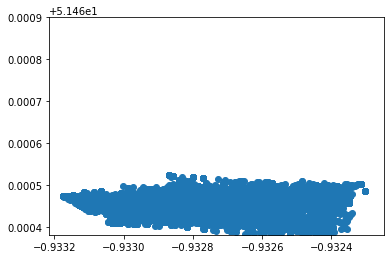

98.8046219996563


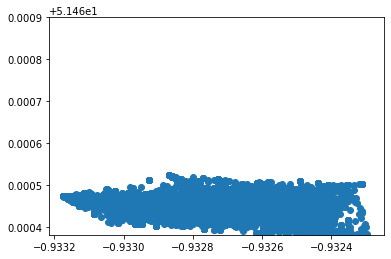

97.10887715683953


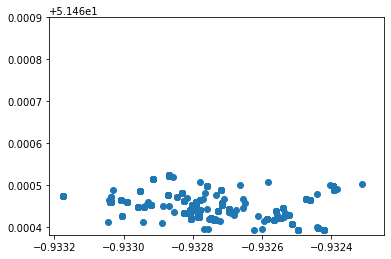

106.30429729893197


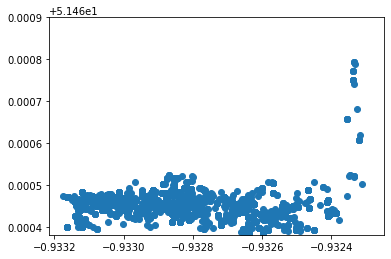

97.01852302722574


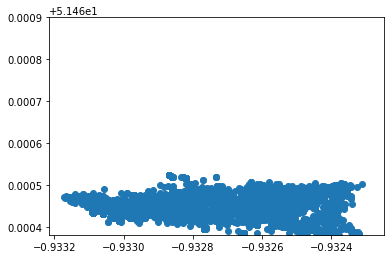

97.14900133481748


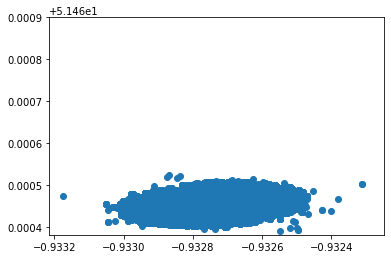

112.73415841314274


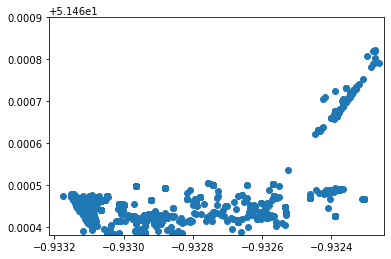

94.17425334406506


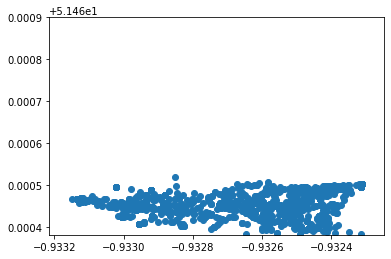

71.87840686749408


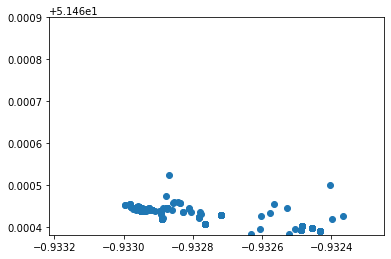

77.65963472182757


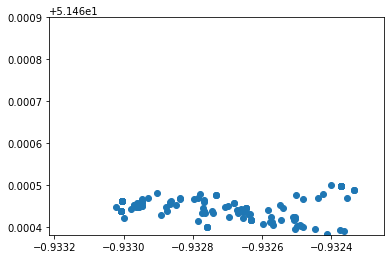

In [20]:
# Distance
weekend_guy = np.array(df_weekend['ClientMacAddr'].head(10))
for i in weekend_guy:
    person = df[df['ClientMacAddr'] == i ]
    person_min_lng = min(person['lng'])
    person_max_lng = max(person['lng'])
    person_min_lat = min(person['lat'])
    person_max_lat = max(person['lat'])
    person_distance = 111139 * ((person_max_lng - person_min_lng)**2 + (person_max_lat - person_min_lat)**2)**0.5
    print(person_distance)
    plt.scatter(person['lng'], person['lat'])
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.show()

## Define the characteristics of Mac ID

Fixed device:
1. Distance < 10 meters

2. Frequency in days >= 80 / 180 Days
3. Contain data in weekends
4. Contain data in night shift


Mobile device:
1. Distance >= 10 meters
2. Low density
     - Security guard: 
     1. Night shift
     2. Frequency in days > 5
     3. Contain data in weekend
     - Employee:
     1. Frequency in days > 5
     2. No weekends
     - Visitors:
     1. Frequency in days <= 5
     2. No weekends

In [21]:
# Distribution for max distance
temp1 = df.groupby(['ClientMacAddr', 'date'])['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby(['ClientMacAddr', 'date'])['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on=['ClientMacAddr', 'date'])
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp.sort_values(['ClientMacAddr', 'date', 'Distance(Meter)'], ascending = [True, True, False])

,ClientMacAddr,date,max_lat,min_lat,max_lng,min_lng,Distance(Meter)
0,00:06:c6:92:a5:c1,2020-03-12,51.460467,51.460465,-0.933132,-0.933136,0.490026
1,00:08:22:9c:c2:fb,2020-02-24,51.460475,51.460475,-0.933124,-0.933124,0.000000
2,00:0c:e7:02:74:e6,2020-08-10,51.460504,51.460418,-0.932312,-0.932663,40.119757
3,00:0c:e7:06:c9:19,2020-08-10,51.460499,51.460483,-0.932310,-0.932421,12.462404
4,00:0c:e7:7d:5b:bf,2020-08-10,51.460419,51.460413,-0.932411,-0.932435,2.810509
...,...,...,...,...,...,...,...
14056,fc:65:de:04:ba:a1,2019-08-13,51.460900,51.460491,-0.932248,-0.932461,51.288403
14057,fc:65:de:04:ba:a1,2019-08-15,51.460832,51.460403,-0.932261,-0.932560,58.125116
14058,fc:94:35:23:ee:a5,2020-07-24,51.460489,51.460394,-0.932477,-0.932778,35.081481
14059,fc:94:35:23:ee:a5,2020-08-19,51.460507,51.460416,-0.932407,-0.932758,40.264025


In [22]:
temp['ClientMacAddr'].value_counts()

88:66:a5:45:b9:ea    100
8c:f5:a3:cd:d2:db     90
78:00:9e:93:6a:d0     82
0c:70:4a:a2:6d:e7     71
98:10:e8:3a:c9:e4     62
                    ... 
ec:ad:b8:8e:04:17      1
24:46:c8:94:ee:1e      1
88:b4:a6:31:3e:80      1
24:46:c8:ec:97:e3      1
80:58:f8:6d:d5:f5      1
Name: ClientMacAddr, Length: 6294, dtype: int64

In [23]:
# Group by Date and average the distance
df_temp = temp.groupby('ClientMacAddr')['Distance(Meter)'].mean().reset_index()
df_temp

,ClientMacAddr,Distance(Meter)
0,00:06:c6:92:a5:c1,0.490026
1,00:08:22:9c:c2:fb,0.000000
2,00:0c:e7:02:74:e6,40.119757
3,00:0c:e7:06:c9:19,12.462404
4,00:0c:e7:7d:5b:bf,2.810509
...,...,...
6289,fc:62:b9:23:ea:05,5.139244
6290,fc:62:b9:5e:ce:70,0.000000
6291,fc:65:de:04:ba:a1,54.706760
6292,fc:94:35:23:ee:a5,37.672753


In [24]:
# Define the Job function
df_temp['Job function'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<10, 'Job function'] = 'Fixed Device'
df_temp

,ClientMacAddr,Distance(Meter),Job function
0,00:06:c6:92:a5:c1,0.490026,Fixed Device
1,00:08:22:9c:c2:fb,0.000000,Fixed Device
2,00:0c:e7:02:74:e6,40.119757,Mobile Device
3,00:0c:e7:06:c9:19,12.462404,Mobile Device
4,00:0c:e7:7d:5b:bf,2.810509,Fixed Device
...,...,...,...
6289,fc:62:b9:23:ea:05,5.139244,Fixed Device
6290,fc:62:b9:5e:ce:70,0.000000,Fixed Device
6291,fc:65:de:04:ba:a1,54.706760,Mobile Device
6292,fc:94:35:23:ee:a5,37.672753,Mobile Device


In [25]:
Fix_device = df_temp[df_temp['Job function']=='Fixed Device'].sort_values('Distance(Meter)', ascending=False).head(10)
Fix_device

,ClientMacAddr,Distance(Meter),Job function
4835,88:66:a5:9c:8e:a7,9.928355,Fixed Device
1616,80:58:f8:07:f0:10,9.883176,Fixed Device
696,24:46:c8:ac:7d:07,9.872595,Fixed Device
2656,80:58:f8:59:e7:75,9.872595,Fixed Device
5348,88:b4:a6:f7:b8:76,9.856454,Fixed Device
6282,f9:ff:1c:99:1e:da,9.820347,Fixed Device
1963,80:58:f8:22:9d:2b,9.755723,Fixed Device
3545,80:58:f8:a5:0d:2d,9.746758,Fixed Device
126,08:cc:27:25:1a:1c,9.744904,Fixed Device
2843,80:58:f8:67:f5:ba,9.714141,Fixed Device


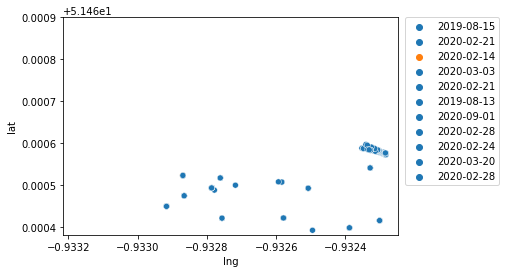

In [41]:
# Assign color for different days
top10_fix = np.array(Fix_device['ClientMacAddr'])


# print(top10_fix)
import seaborn as sns
for i in top10_fix:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

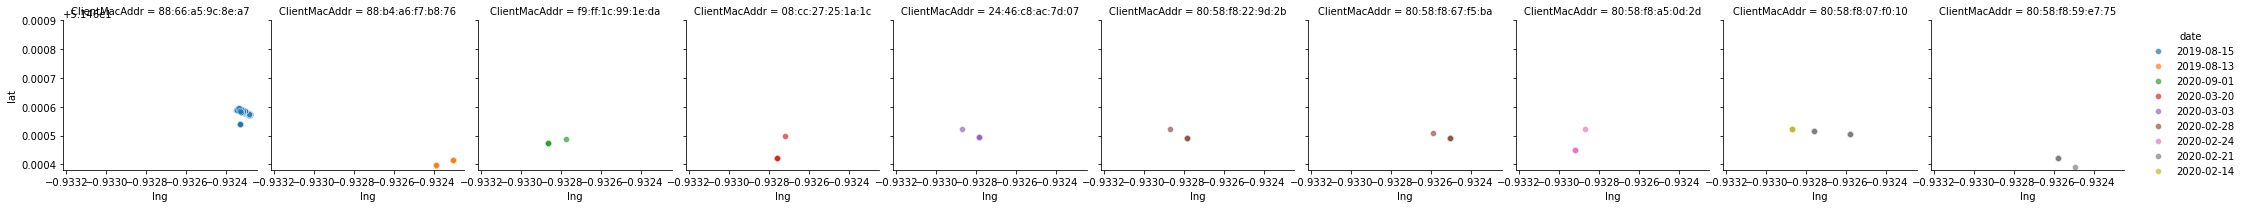

In [40]:
import seaborn as sns
top10_fix = np.array(Fix_device['ClientMacAddr'])
Fix_device_pattern = df[df['ClientMacAddr'].isin(top10_fix)]
# print(Fix_device_pattern)

# Plot
g = sns.FacetGrid(Fix_device_pattern, col="ClientMacAddr", hue="date")
g.map(sns.scatterplot, "lng", "lat", alpha=.7)
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
g.add_legend()


In [42]:
# Mobile device
Mobile_device = df_temp[df_temp['Job function']=='Mobile Device'].sort_values('Distance(Meter)', ascending=False).head(10)
Mobile_device


,ClientMacAddr,Distance(Meter),Job function,total_day,total_signal,Weekday,Weekend
277,10:02:b5:e3:09:63,119.598032,Mobile Device,1,1469,1.0,0.0
1302,5c:f7:e6:e3:f9:c6,118.646993,Mobile Device,1,502,1.0,0.0
1110,48:a4:72:ae:12:67,116.299769,Mobile Device,1,2652,1.0,0.0
884,28:16:ad:17:e3:b9,112.387265,Mobile Device,2,4163,2.0,0.0
272,10:02:b5:e3:08:f0,112.151551,Mobile Device,2,2175,2.0,0.0
1243,5c:5f:67:8b:e2:32,111.880399,Mobile Device,1,767,1.0,0.0
1259,5c:5f:67:8b:fa:8d,111.312369,Mobile Device,1,1944,1.0,0.0
1069,48:45:20:37:d1:10,111.308470,Mobile Device,1,1150,1.0,0.0
1077,48:45:20:37:e8:f3,109.397493,Mobile Device,3,4178,3.0,0.0
1058,48:45:20:37:c0:a3,108.461140,Mobile Device,3,4155,3.0,0.0


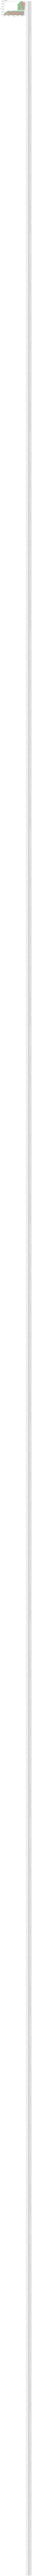

In [46]:
# Assign color for different days
top10_mobile = np.array(Mobile_device['ClientMacAddr'])
Mobile_device_pattern = df[df['ClientMacAddr'].isin(top10_mobile)]

# print(top10_fix)
import seaborn as sns
for i in Mobile_device_pattern:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=df, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

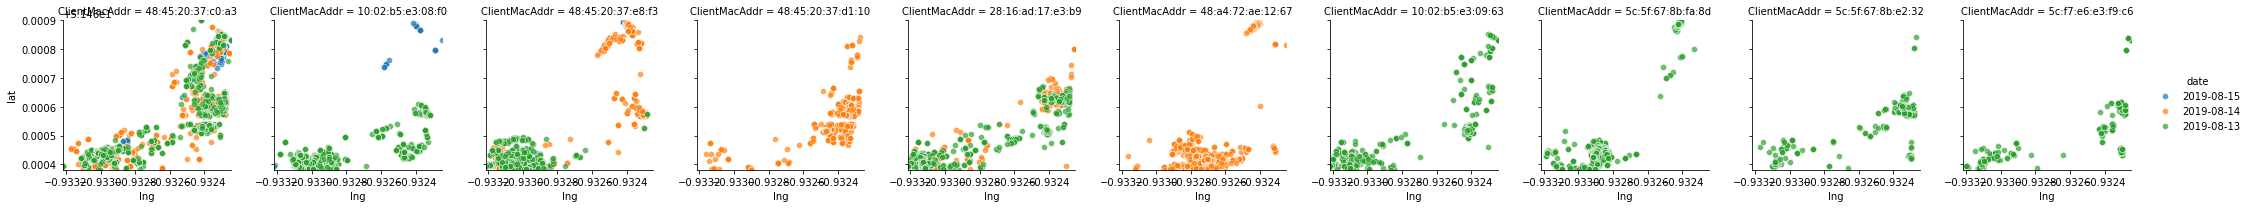

In [44]:
import seaborn as sns
top10_mobile = np.array(Mobile_device['ClientMacAddr'])
Mobile_device_pattern = df[df['ClientMacAddr'].isin(top10_mobile)]
# print(Fix_device_pattern)

# Plot
g = sns.FacetGrid(Mobile_device_pattern, col="ClientMacAddr", hue="date")
g.map(sns.scatterplot, "lng", "lat", alpha=.7)
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
g.add_legend()

In [28]:
# Add total day and signal
df_temp = df_temp.merge(frequency, on='ClientMacAddr')
df_temp

,ClientMacAddr,Distance(Meter),Job function,total_day,total_signal
0,00:06:c6:92:a5:c1,0.490026,Fixed Device,1,13
1,00:08:22:9c:c2:fb,0.000000,Fixed Device,1,12
2,00:0c:e7:02:74:e6,40.119757,Mobile Device,1,14
3,00:0c:e7:06:c9:19,12.462404,Mobile Device,1,13
4,00:0c:e7:7d:5b:bf,2.810509,Fixed Device,1,13
...,...,...,...,...,...
6289,fc:62:b9:23:ea:05,5.139244,Fixed Device,2,50
6290,fc:62:b9:5e:ce:70,0.000000,Fixed Device,1,13
6291,fc:65:de:04:ba:a1,54.706760,Mobile Device,2,864
6292,fc:94:35:23:ee:a5,37.672753,Mobile Device,2,39


In [29]:
# Add Weekdays and Weekend
df_temp = df_temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})
df_temp

,ClientMacAddr,Distance(Meter),Job function,total_day,total_signal,Weekday,Weekend
0,00:06:c6:92:a5:c1,0.490026,Fixed Device,1,13,1.0,0.0
1,00:08:22:9c:c2:fb,0.000000,Fixed Device,1,12,1.0,0.0
2,00:0c:e7:02:74:e6,40.119757,Mobile Device,1,14,1.0,0.0
3,00:0c:e7:06:c9:19,12.462404,Mobile Device,1,13,1.0,0.0
4,00:0c:e7:7d:5b:bf,2.810509,Fixed Device,1,13,1.0,0.0
...,...,...,...,...,...,...,...
6289,fc:62:b9:23:ea:05,5.139244,Fixed Device,2,50,2.0,0.0
6290,fc:62:b9:5e:ce:70,0.000000,Fixed Device,1,13,1.0,0.0
6291,fc:65:de:04:ba:a1,54.706760,Mobile Device,2,864,2.0,0.0
6292,fc:94:35:23:ee:a5,37.672753,Mobile Device,2,39,2.0,0.0


In [30]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6294 entries, 0 to 6293
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientMacAddr    6294 non-null   object 
 1   Distance(Meter)  6294 non-null   float64
 2   Job function     6294 non-null   object 
 3   total_day        6294 non-null   int64  
 4   total_signal     6294 non-null   int64  
 5   Weekday          6294 non-null   float64
 6   Weekend          6294 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 393.4+ KB


In [31]:
# Define the Job function
df_temp['Job function'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<10, 'Job function'] = 'Fixed Device'
df_temp

,ClientMacAddr,Distance(Meter),Job function,total_day,total_signal,Weekday,Weekend
0,00:06:c6:92:a5:c1,0.490026,Fixed Device,1,13,1.0,0.0
1,00:08:22:9c:c2:fb,0.000000,Fixed Device,1,12,1.0,0.0
2,00:0c:e7:02:74:e6,40.119757,Mobile Device,1,14,1.0,0.0
3,00:0c:e7:06:c9:19,12.462404,Mobile Device,1,13,1.0,0.0
4,00:0c:e7:7d:5b:bf,2.810509,Fixed Device,1,13,1.0,0.0
...,...,...,...,...,...,...,...
6289,fc:62:b9:23:ea:05,5.139244,Fixed Device,2,50,2.0,0.0
6290,fc:62:b9:5e:ce:70,0.000000,Fixed Device,1,13,1.0,0.0
6291,fc:65:de:04:ba:a1,54.706760,Mobile Device,2,864,2.0,0.0
6292,fc:94:35:23:ee:a5,37.672753,Mobile Device,2,39,2.0,0.0


In [32]:
df_temp['Job function'].value_counts()

Fixed Device     4118
Mobile Device    2176
Name: Job function, dtype: int64

/Users/rickywang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distance(Meter)', ylabel='Density'>

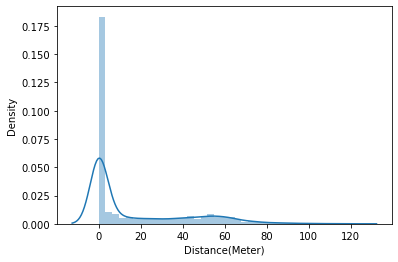

In [33]:
# Distribution of distance
import seaborn as sns
sns.distplot(df_temp['Distance(Meter)'])

/Users/rickywang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_day', ylabel='Density'>

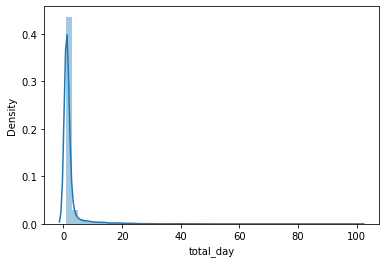

In [34]:
sns.distplot(df_temp['total_day'])

/Users/rickywang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_signal', ylabel='Density'>

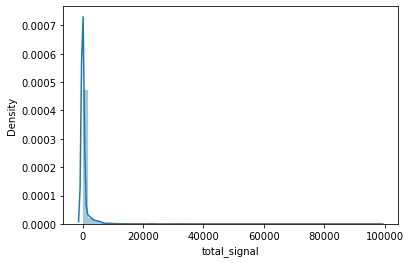

In [35]:
sns.distplot(df_temp['total_signal'])

In [36]:
df_temp.describe()

,Distance(Meter),total_day,total_signal,Weekday,Weekend
count,6294.000000,6294.000000,6294.000000,6294.000000,6294.000000
mean,15.917164,2.234032,533.926756,2.221799,0.012234
std,24.206312,4.570723,2522.069203,4.441658,0.446762
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,13.000000,1.000000,0.000000
50%,0.000000,1.000000,13.000000,1.000000,0.000000
75%,30.184441,2.000000,39.000000,2.000000,0.000000
max,119.598032,100.000000,98013.000000,90.000000,28.000000


In [37]:
# Define the Job function
df_temp['Job function'] = 'Mobile Device'
df_temp.loc[(df_temp['Distance(Meter)']<10) & (df_temp['total_day'] > 5), 'Job function'] = 'Fixed Device'
df_temp

,ClientMacAddr,Distance(Meter),Job function,total_day,total_signal,Weekday,Weekend
0,00:06:c6:92:a5:c1,0.490026,Mobile Device,1,13,1.0,0.0
1,00:08:22:9c:c2:fb,0.000000,Mobile Device,1,12,1.0,0.0
2,00:0c:e7:02:74:e6,40.119757,Mobile Device,1,14,1.0,0.0
3,00:0c:e7:06:c9:19,12.462404,Mobile Device,1,13,1.0,0.0
4,00:0c:e7:7d:5b:bf,2.810509,Mobile Device,1,13,1.0,0.0
...,...,...,...,...,...,...,...
6289,fc:62:b9:23:ea:05,5.139244,Mobile Device,2,50,2.0,0.0
6290,fc:62:b9:5e:ce:70,0.000000,Mobile Device,1,13,1.0,0.0
6291,fc:65:de:04:ba:a1,54.706760,Mobile Device,2,864,2.0,0.0
6292,fc:94:35:23:ee:a5,37.672753,Mobile Device,2,39,2.0,0.0


In [38]:
df_temp['Job function'].value_counts()

Mobile Device    6281
Fixed Device       13
Name: Job function, dtype: int64